<AxesSubplot:xlabel='Population', ylabel='Count'>

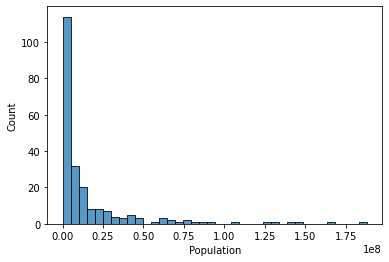

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('CIA_Country_Facts.csv')
sns.histplot(data=df[df['Population']<200000000],x='Population')

In [132]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

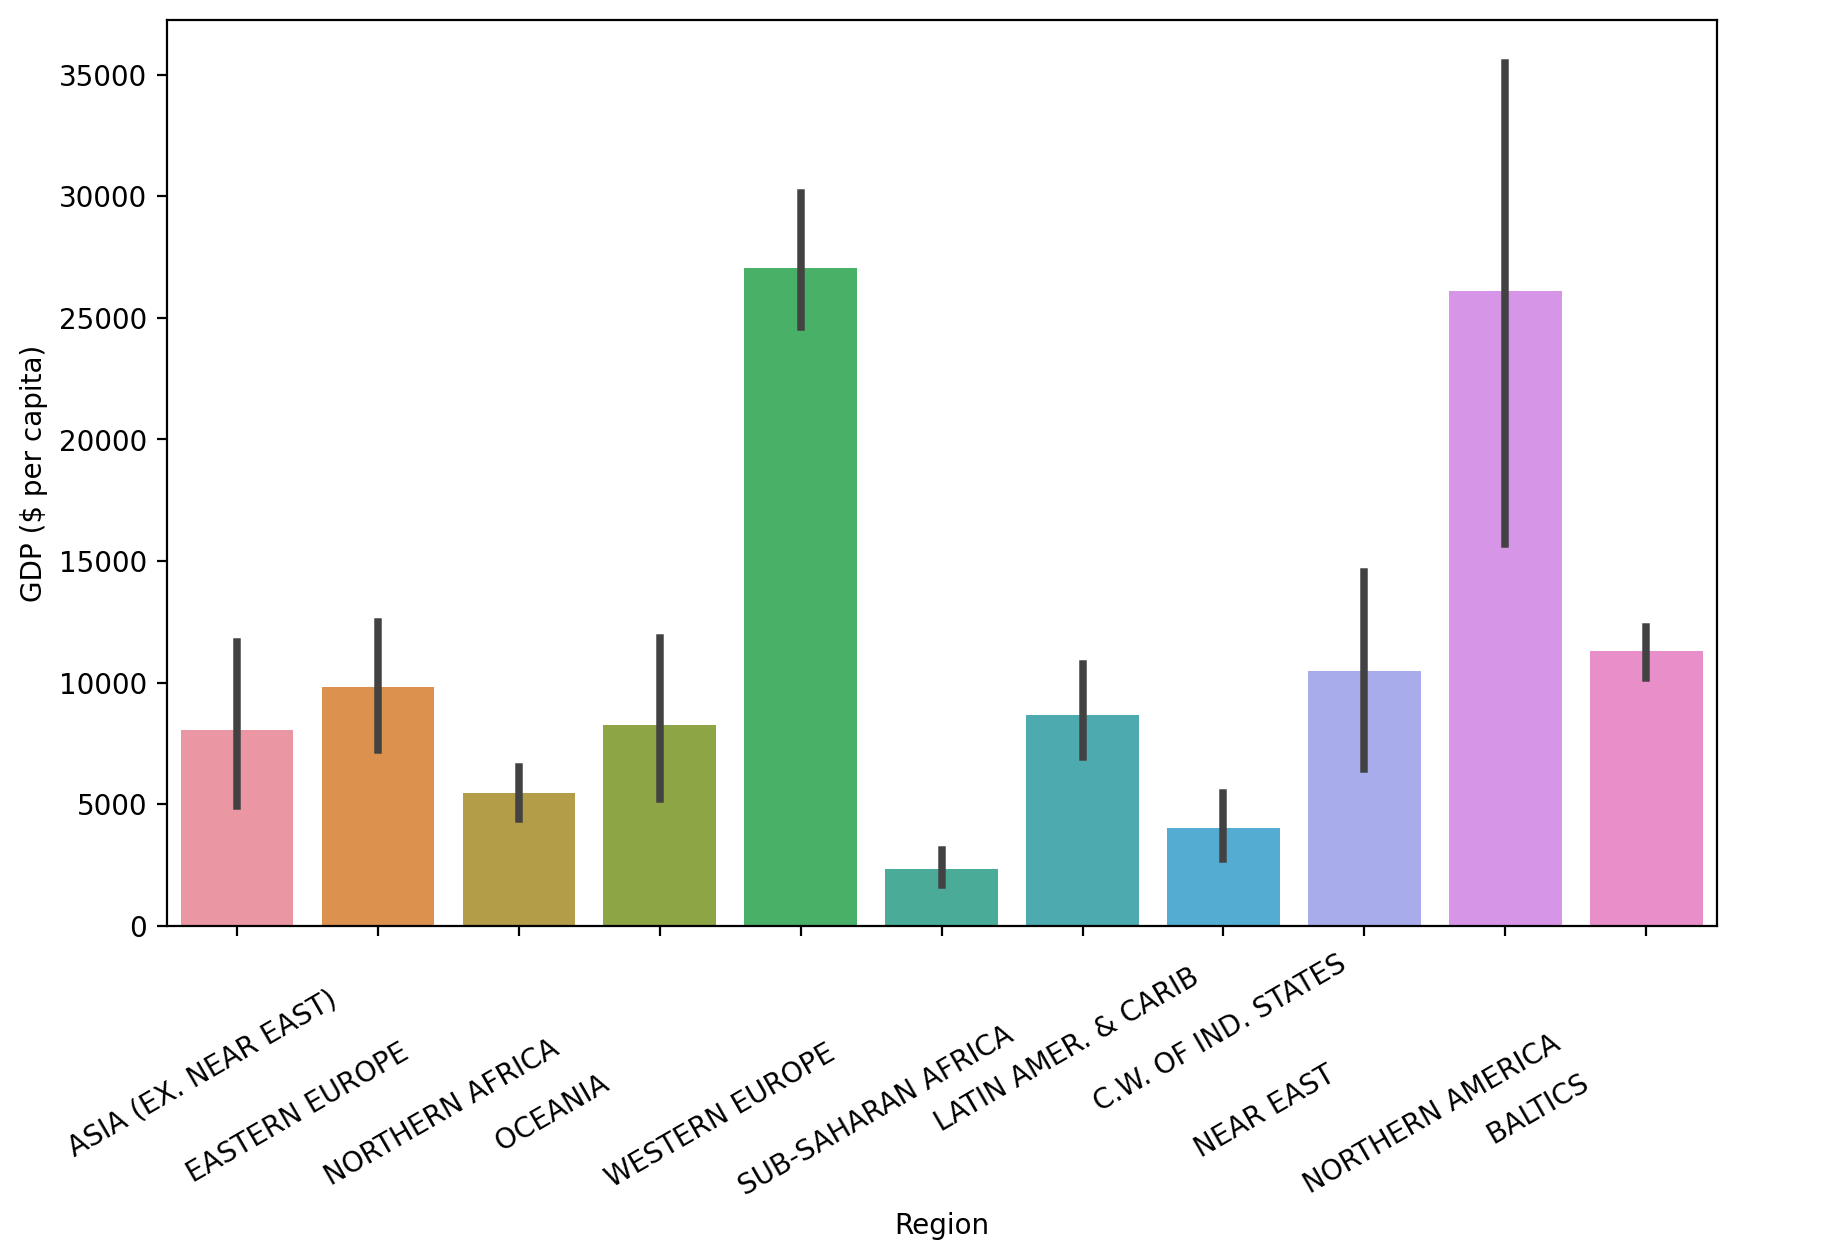

In [133]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(data=df,y='GDP ($ per capita)',x='Region')
plt.xticks(rotation=30);

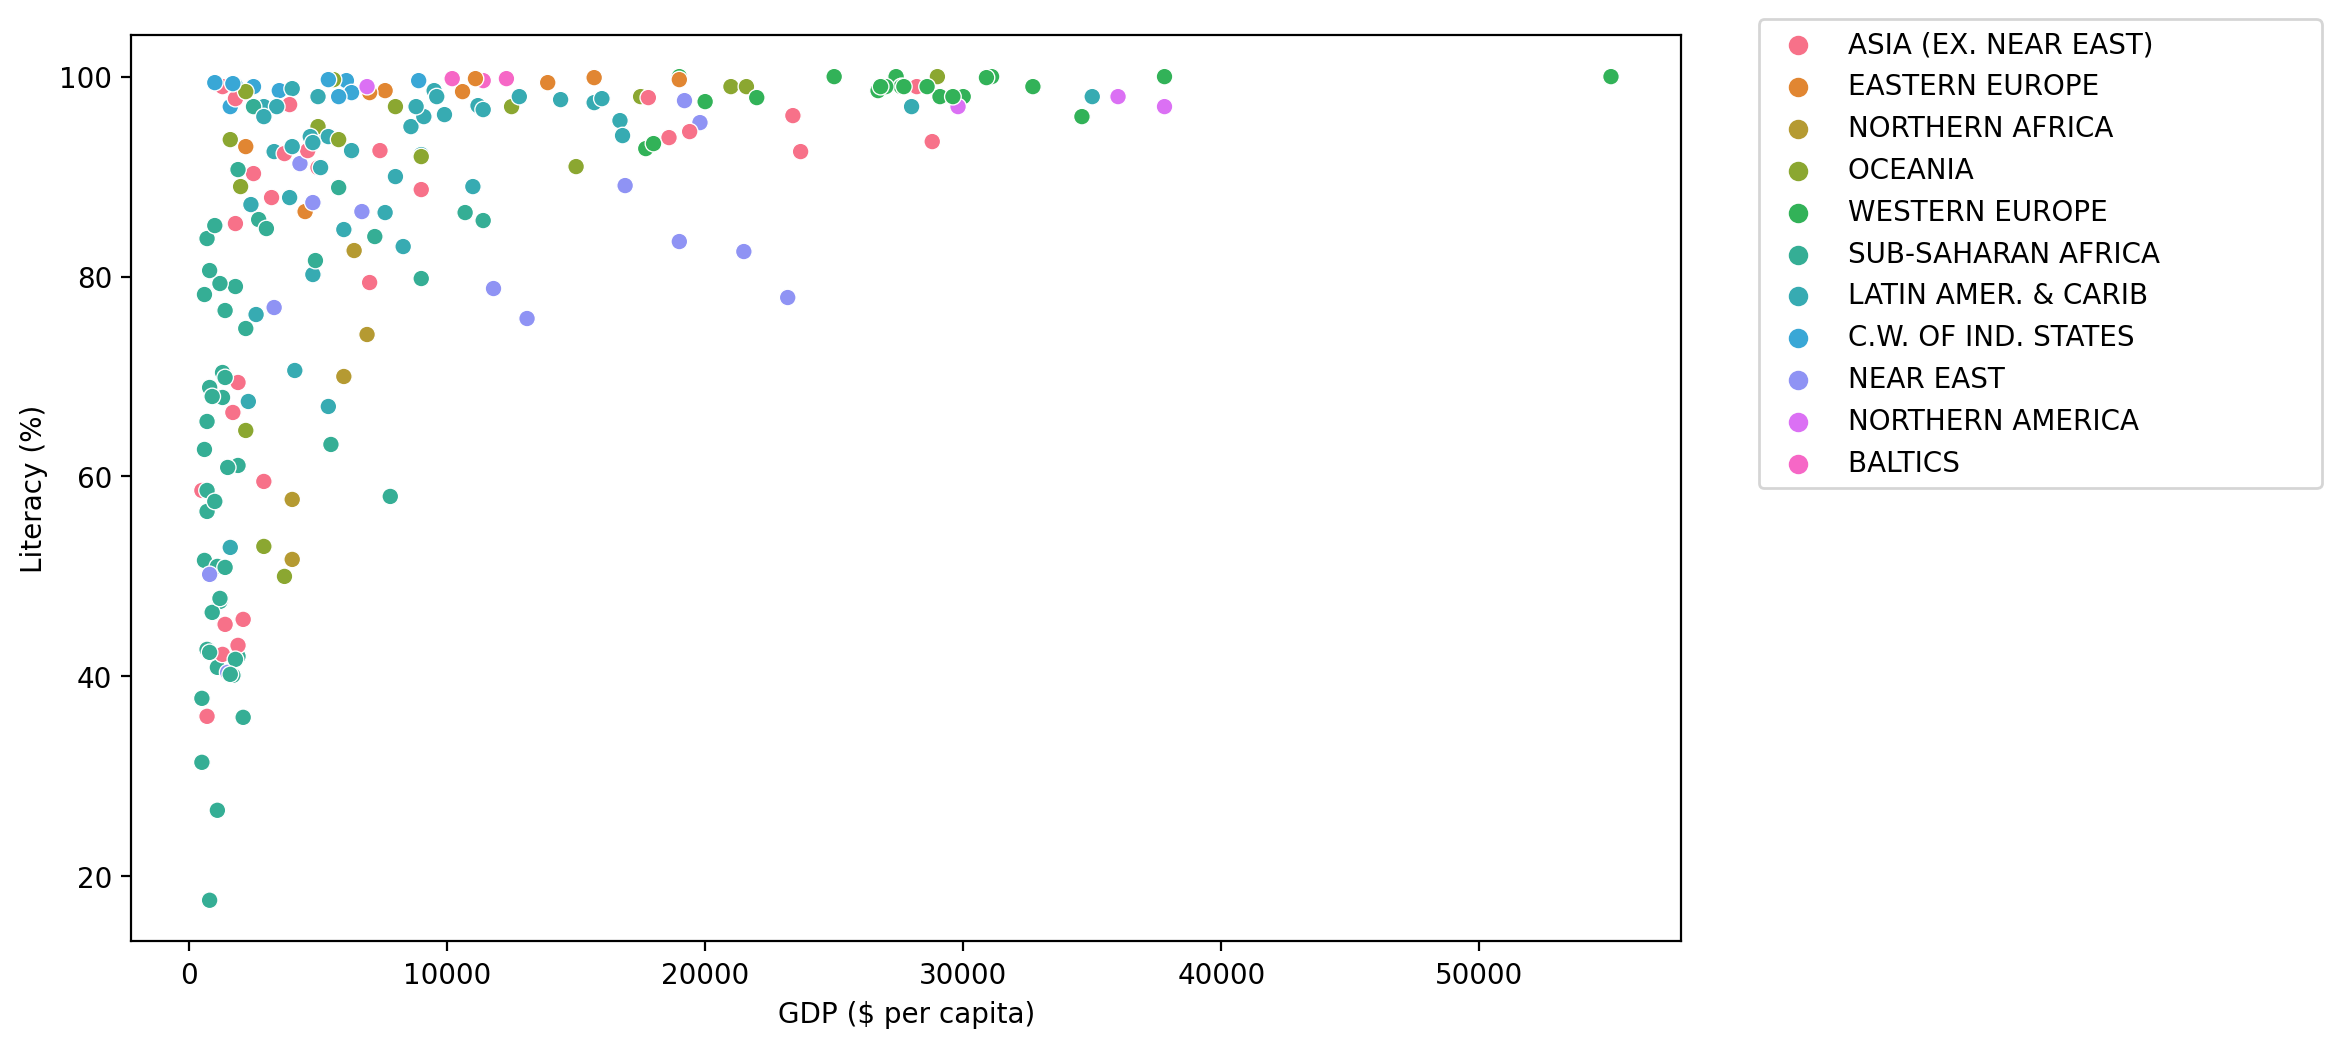

In [137]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Literacy (%)',hue='Region')
plt.legend(loc=(1.05,0.5))

<AxesSubplot:>

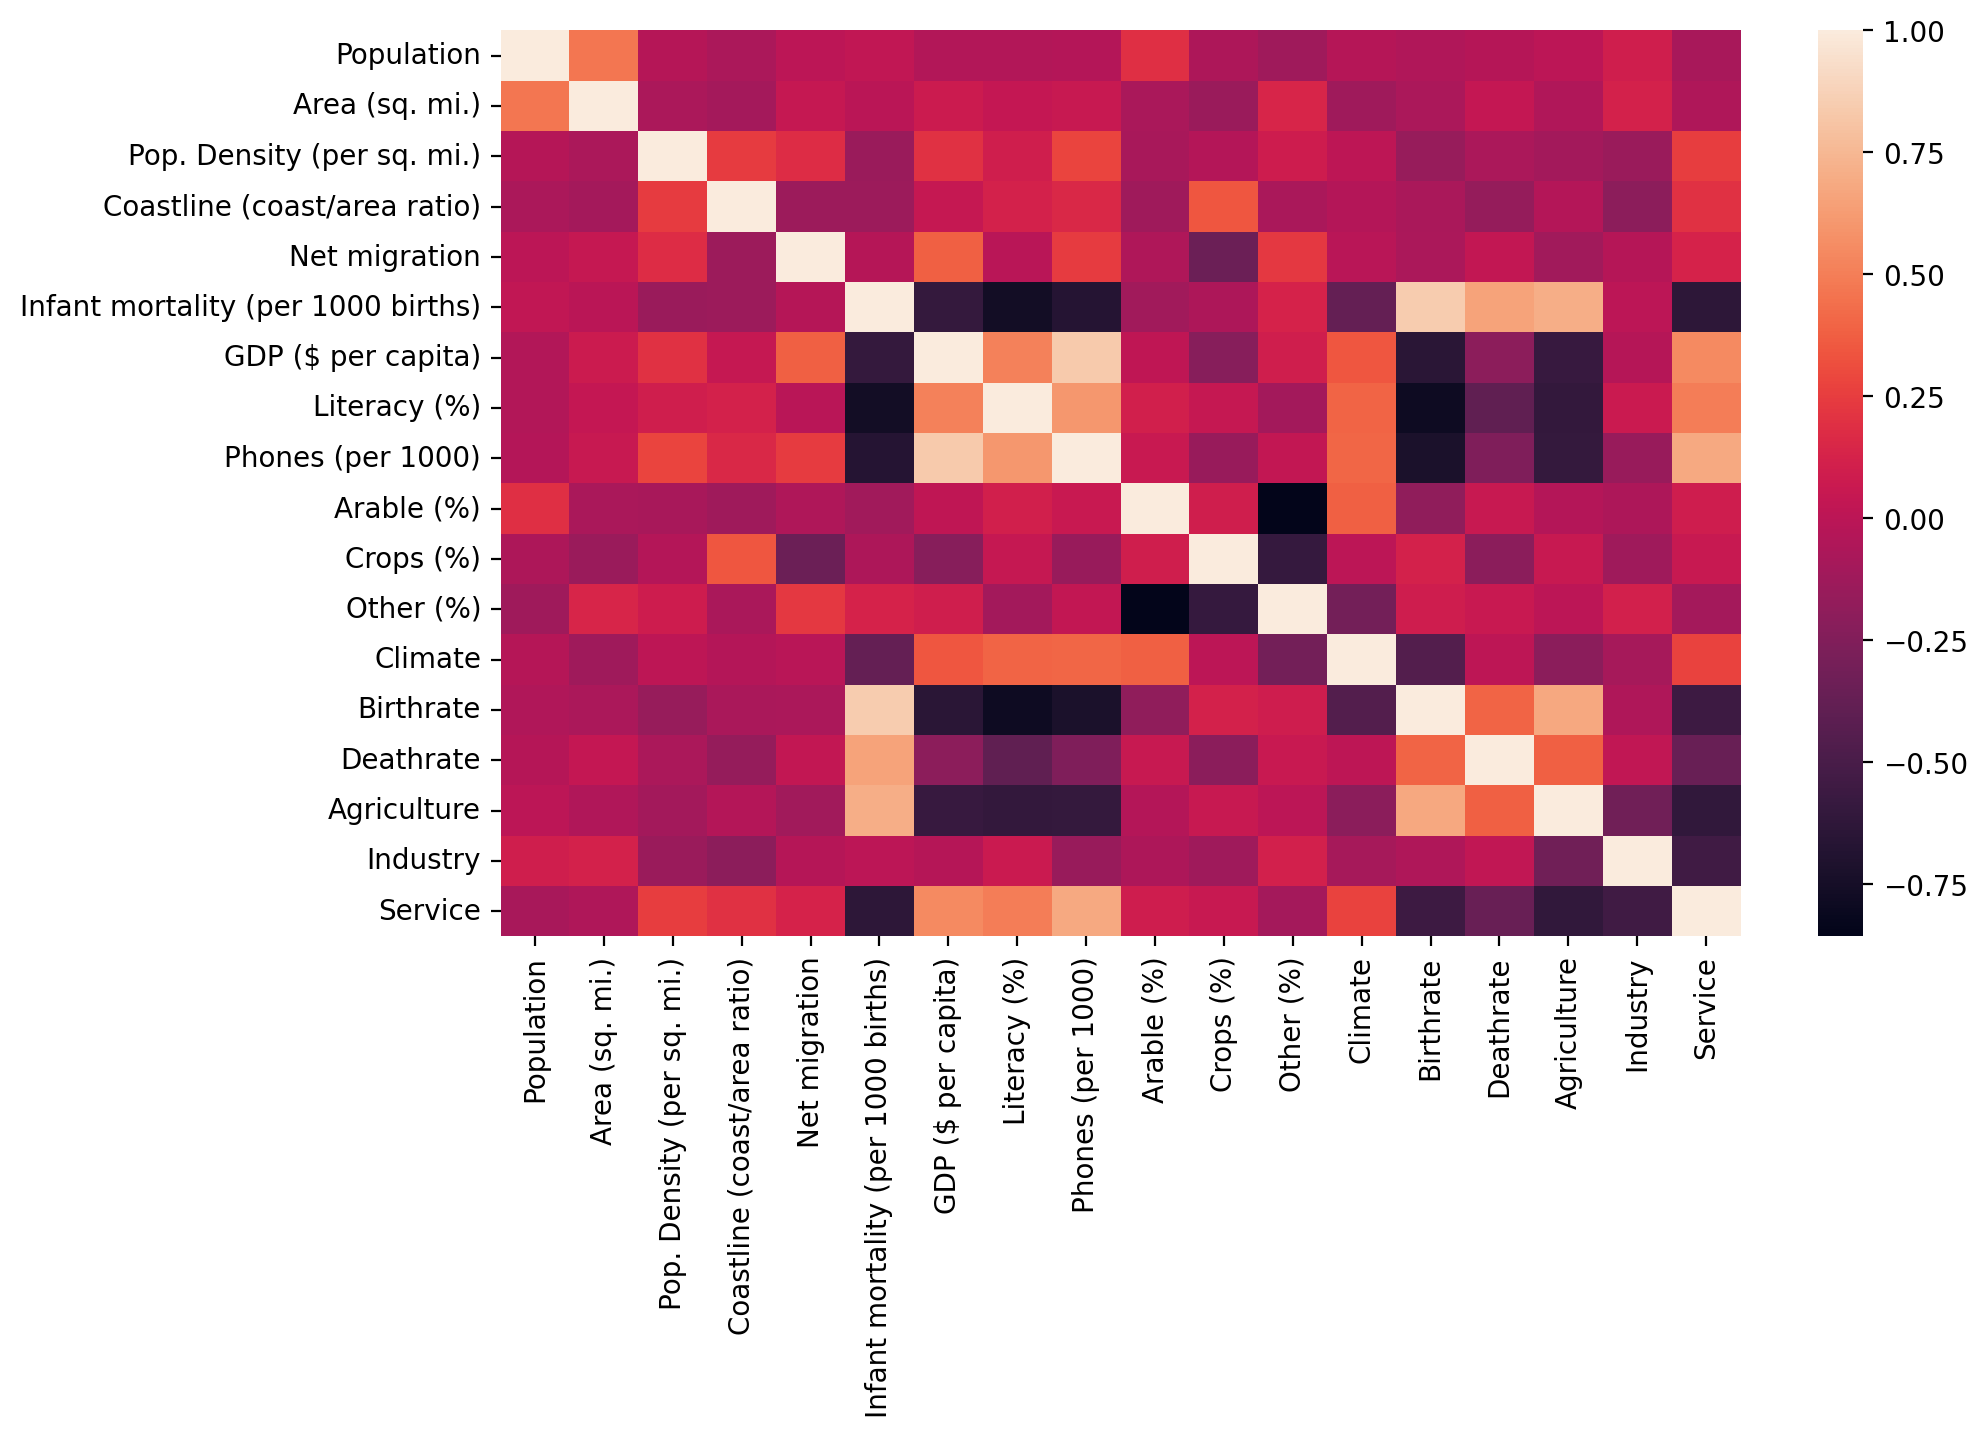

In [138]:
plt.figure(figsize=(10,6),dpi=200)
sns.heatmap(df.corr())

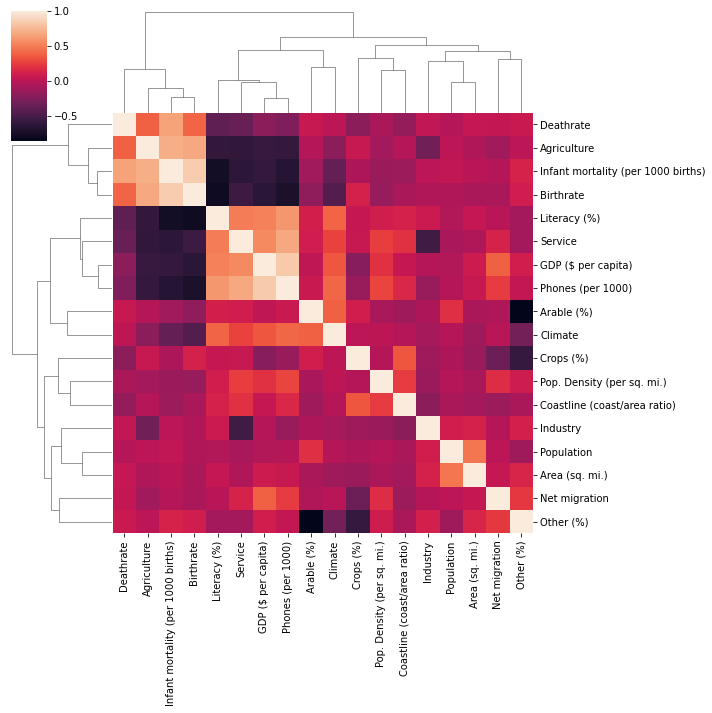

In [139]:
sns.clustermap(df.corr())

In [140]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [141]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

In [142]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [150]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))
df = df.dropna()

In [158]:
x= df.drop('Country',axis=1)
x = pd.get_dummies(x)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

from sklearn.cluster import KMeans

ssd =[]
for k in range(2,30):
    model = KMeans(n_clusters=k)
    model.fit(scaled_x)
    
    ssd.append(model.inertia_)

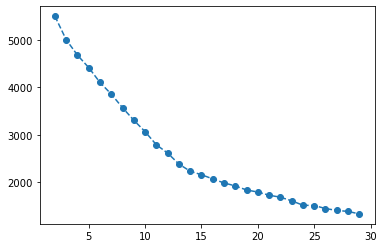

In [160]:
plt.plot(range(2,30),ssd,'o--')

<AxesSubplot:>

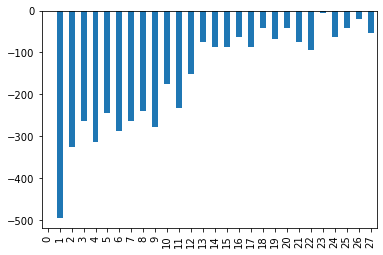

In [161]:
pd.Series(ssd).diff().plot(kind='bar')

<AxesSubplot:>

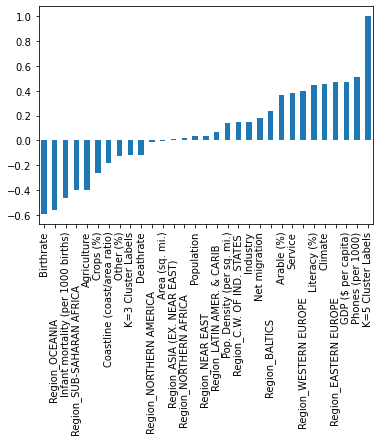

In [175]:
model = KMeans(n_clusters=5)
model.fit(scaled_x)
x['K=5 Cluster Labels'] = model.labels_

x.corr()['K=5 Cluster Labels'].sort_values().plot(kind='bar')

In [177]:
iso_codes = pd.read_csv('country_iso_codes.csv')
iso_map = iso_codes.set_index('Country')['ISO Code'].to_dict()
df['ISO CODE'] = df['Country'].map(iso_map)
df['Cluster'] = model.labels_
import plotly.express as px

fig = px.choropleth(df,
                   locations='ISO CODE',
                   color ='Cluster',
                   hover_name = 'Country')
fig.show()

C:\Users\ezioi\AppData\Local\Temp/ipykernel_9736/2256516652.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ezioi\AppData\Local\Temp/ipykernel_9736/2256516652.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

